# Taller 2 - Fundamentos de Análitica: Object localization

Integrantes: 
- Cristhian Castillo.
- Kevin Zarama.

**Objetivo**: El objetivo de este notebook es obtener un modelo que permita localizar un número del 0 al 9, dentro de una imagen y predecir de que número se trata. Las imagenes contienen un solo número.

<h1>Tabla de Contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Información-del-taller" data-toc-modified-id="Información-del-taller-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Información del taller</a></span><ul class="toc-item"><li><span><a href="#Puntos-a-Evaluar" data-toc-modified-id="Puntos-a-Evaluar-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Puntos a Evaluar</a></span></li><li><span><a href="#Submission-Format" data-toc-modified-id="Submission-Format-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Submission Format</a></span></li></ul></li><li><span><a href="#Packages-and-Functions" data-toc-modified-id="Packages-and-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Packages and Functions</a></span><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#Project-Config" data-toc-modified-id="Project-Config-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Project Config</a></span><ul class="toc-item"><li><span><a href="#Configuring-GPU-or-CPU-usage-based-on-available-resources" data-toc-modified-id="Configuring-GPU-or-CPU-usage-based-on-available-resources-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Configuring GPU or CPU usage based on available resources</a></span></li><li><span><a href="#Seed-Config" data-toc-modified-id="Seed-Config-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Seed Config</a></span></li></ul></li><li><span><a href="#Creating-Dataset-Structure" data-toc-modified-id="Creating-Dataset-Structure-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating Dataset Structure</a></span><ul class="toc-item"><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Constantes-del-proyecto" data-toc-modified-id="Constantes-del-proyecto-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Constantes del proyecto</a></span></li><li><span><a href="#Manejo-de-las-imagenes-(Clases-y-Bounding-Boxes)" data-toc-modified-id="Manejo-de-las-imagenes-(Clases-y-Bounding-Boxes)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Manejo de las imagenes (Clases y Bounding Boxes)</a></span></li><li><span><a href="#Image-Normalization" data-toc-modified-id="Image-Normalization-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Image Normalization</a></span></li><li><span><a href="#Image-To-Tensor" data-toc-modified-id="Image-To-Tensor-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Image To Tensor</a></span></li></ul></li><li><span><a href="#Feature-Extractor-Model-(Backbone)" data-toc-modified-id="Feature-Extractor-Model-(Backbone)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Extractor Model (Backbone)</a></span></li><li><span><a href="#Object-classification-Model" data-toc-modified-id="Object-classification-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Object classification Model</a></span></li><li><span><a href="#Bounding-box-prediction-Model" data-toc-modified-id="Bounding-box-prediction-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bounding box prediction Model</a></span></li><li><span><a href="#Model-for-classification-and-objects-location" data-toc-modified-id="Model-for-classification-and-objects-location-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model for classification and objects location</a></span></li><li><span><a href="#Methods-for-training-the-model" data-toc-modified-id="Methods-for-training-the-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Methods for training the model</a></span><ul class="toc-item"><li><span><a href="#Loss-Function" data-toc-modified-id="Loss-Function-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Loss Function</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Metrics</a></span><ul class="toc-item"><li><span><a href="#Accurancy-Metrics" data-toc-modified-id="Accurancy-Metrics-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Accurancy Metrics</a></span></li><li><span><a href="#Intersection-over-Union-(IoU)-Metric" data-toc-modified-id="Intersection-over-Union-(IoU)-Metric-9.2.2"><span class="toc-item-num">9.2.2&nbsp;&nbsp;</span>Intersection over Union (IoU) Metric</a></span></li></ul></li><li><span><a href="#Callbacks" data-toc-modified-id="Callbacks-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Callbacks</a></span></li><li><span><a href="#Optimizer" data-toc-modified-id="Optimizer-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Optimizer</a></span></li></ul></li><li><span><a href="#Base-Model" data-toc-modified-id="Base-Model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Base Model</a></span></li><li><span><a href="#Predictions-Visualization" data-toc-modified-id="Predictions-Visualization-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Predictions Visualization</a></span></li><li><span><a href="#Transfer-Learning" data-toc-modified-id="Transfer-Learning-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#Image-normalization-transforms" data-toc-modified-id="Image-normalization-transforms-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Image normalization transforms</a></span></li><li><span><a href="#ResNet152" data-toc-modified-id="ResNet152-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>ResNet152</a></span></li><li><span><a href="#Model-for-classification-and-regression-using-transfer-learning" data-toc-modified-id="Model-for-classification-and-regression-using-transfer-learning-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Model for classification and regression using transfer learning</a></span></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Train Model</a></span></li><li><span><a href="#AlexNet" data-toc-modified-id="AlexNet-12.5"><span class="toc-item-num">12.5&nbsp;&nbsp;</span>AlexNet</a></span></li><li><span><a href="#Model-for-classification-and-regression-using-transfer-learning" data-toc-modified-id="Model-for-classification-and-regression-using-transfer-learning-12.6"><span class="toc-item-num">12.6&nbsp;&nbsp;</span>Model for classification and regression using transfer learning</a></span></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-12.7"><span class="toc-item-num">12.7&nbsp;&nbsp;</span>Train Model</a></span></li></ul></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Data Augmentation</a></span><ul class="toc-item"><li><span><a href="#AlbumentationsWrapper" data-toc-modified-id="AlbumentationsWrapper-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>AlbumentationsWrapper</a></span></li><li><span><a href="#Train-data-augmentation" data-toc-modified-id="Train-data-augmentation-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Train data augmentation</a></span></li></ul></li><li><span><a href="#Train-Models-with-Data-augmentation" data-toc-modified-id="Train-Models-with-Data-augmentation-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Train Models with Data augmentation</a></span></li><li><span><a href="#Image-To-Tensor" data-toc-modified-id="Image-To-Tensor-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Image To Tensor</a></span><ul class="toc-item"><li><span><a href="#Image-normalization" data-toc-modified-id="Image-normalization-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Image normalization</a></span></li><li><span><a href="#Data-augmentations" data-toc-modified-id="Data-augmentations-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>Data augmentations</a></span></li></ul></li><li><span><a href="#Model-for-classification-and-objects-location" data-toc-modified-id="Model-for-classification-and-objects-location-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Model for classification and objects location</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Metrics</a></span></li><li><span><a href="#Callbacks" data-toc-modified-id="Callbacks-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Callbacks</a></span></li><li><span><a href="#Training-loop" data-toc-modified-id="Training-loop-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Training loop</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Predictions-visualization" data-toc-modified-id="Predictions-visualization-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>Predictions visualization</a></span></li><li><span><a href="#Save-Model" data-toc-modified-id="Save-Model-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>Save Model</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-23"><span class="toc-item-num">23&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

## Información del taller

### Puntos a Evaluar
- **Custom CNN**: Create a custom Convolutional Neural Network model as a backbone (feature extractor) and train it from scratch (1.5 points)

- **Bounding box prediction**: Implement a regression head that is fed with the features extracted from the convolutional backbone. (1 point)

- **Object classification**: Implement a classification head that is fed with the features extracted from the convolutional backbone (1 point)

- **Transfer learning**: Use two pretrained models as backbones and connect the previously created classification and regression heads in order to receive inputs from them. (1 point)

- **Data augmentation**: Compare the use of different data augmentation techniques in order to see their impact in the performance of both tasks (classification and regression) (0.5 points)

Be aware that you must follow a correct evaluation protocol in order to avoid data leakage from the test sets on the data processing steps. Mistakes will be punished (-0.5 points each).

The evaluation metric for this competition is the dice coefficient for the bounding box regression task and accuracy for the object classification task.

### Submission Format
For every set in the dataset, submission files should contain the following columns:

filename, the filename of the image
class, the predicted class

## Packages and Functions

### Packages

In [1]:
# General
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import copy
import typing as ty
from multiprocessing import cpu_count
import math
import time


# Sklearn
from sklearn.model_selection import train_test_split

# Images
from skimage import io
import albumentations as A
import torchvision
import cv2
from torchvision import ops, transforms
from torchvision.models import resnet152, alexnet



# Neural Networks
import torch
from torchsummary import summary
from torch import nn
from torchvision.transforms.functional import resize
from torch import Tensor
import torch.nn.functional as F
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.utils.data import SubsetRandomSampler

In [2]:
plt.ion()   # matplotlib interactive mode

### Functions

In [3]:
sys.path.append("custom_utils/")

In [4]:
from bounding_boxes import MNISTDataset, normalize_bbox, draw_predictions, draw_bbox
from models import FeatureExtractor, ClassificationHead, RegressionHead, train
from constants import load_config

In [5]:
import importlib

importlib.reload(sys.modules["bounding_boxes"])
importlib.reload(sys.modules["models"])
importlib.reload(sys.modules["constants"])

<module 'constants' from '/workspace/study/datascience_master/Analytics Fundamentals 2/challenges/second_challange/constants.py'>

## Project Config

### Configuring GPU or CPU usage based on available resources

Usaremos GPU en caso de que esté disponible, sino se usará la GPU para el procesamiento.

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device}')

Using cuda


Probamos que funcione correctamente el uso del device.

In [7]:
test = torch.ones((100, 100)).to(device)
del test
torch.cuda.empty_cache()

### Seed Config

Definimos una semilla para obtener los mismos resultados siempre que el notebook sea corrido. Esto nos ayudará a darnos una idea más clara de como el modelo va mejorando realmente.

In [8]:
seed = 42

torch.backends.cudnn.enabled = True
torch.manual_seed(seed)
np.random.seed(seed)

if(device == 'cuda'):
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

## Creating Dataset Structure

### Load dataset

In [9]:
df = pd.read_csv("datasets/train.csv")

### Data Overview

In [10]:
df

,filename,class,xmin,ymin,xmax,ymax
0,converted_training12629.png,0,0.34,0.28,0.62,0.56
1,converted_training37731.png,7,0.16,0.67,0.44,0.95
2,converted_training39992.png,1,0.47,0.30,0.75,0.58
3,converted_training8526.png,4,0.17,0.16,0.45,0.44
4,converted_training8280.png,4,0.17,0.22,0.45,0.50
...,...,...,...,...,...,...
7995,converted_training31907.png,9,0.58,0.10,0.86,0.38
7996,converted_training22702.png,0,0.20,0.54,0.48,0.82
7997,converted_training24097.png,5,0.07,0.57,0.35,0.85
7998,converted_training52223.png,9,0.08,0.41,0.36,0.69


In [11]:
df.columns

Index(['filename', 'class', 'xmin', 'ymin', 'xmax', 'ymax'], dtype='object')

El dataset cuenta con 6 columnas:

1. **filename**: Nombre del archivo que contiene la imagen del digito.
2. **class:**: digito que aparece en la imagen.
3. **xmin**: coordenada x del punto más cercano.
4. **ymin**: coordenada del punto y más cercano.
5. **xmax**: coordenada x del punto más alejado.
6. **ymax**: coordenada y del punto más alejado.

Con los dos puntos podemos generar el recuadro para encerrar los digitos dentro de un cuadrado.

Renombramos la variable class a class_id que es el nombre que manejaremos a lo largo del proyecto.

In [12]:
df.rename(columns={"class": "class_id"}, inplace=True)

### Train test split

Separamos el dataset en datos de entrenamiento y prueba. Y estratificamos los datos para que cuenten con una cantidad de clases similar en los conjuntos de datos que obtendremos.

Usaremos el 15% como datos de prueba.

In [13]:
train_df, test_df = train_test_split(
    df, stratify=df['class_id'], test_size=0.15, random_state=seed
)

In [14]:
print(train_df.shape)
print(test_df.shape)

(6800, 6)
(1200, 6)


Revisamos como quedó la estratificación de los datos de entrenamiento

In [15]:
pd.value_counts(train_df['class_id'])

1    730
7    709
9    698
3    696
2    678
0    674
6    671
4    652
5    649
8    643
Name: class_id, dtype: int64

In [16]:
train_df['class_id'].value_counts(1) * 100

1    10.735294
7    10.426471
9    10.264706
3    10.235294
2     9.970588
0     9.911765
6     9.867647
4     9.588235
5     9.544118
8     9.455882
Name: class_id, dtype: float64

Vemos que cada clase ronda entre un 9.4% y 10.7% de los datos en el conjunto de entrenamiento.

Revisemos ahora los datos de prueba

In [17]:
pd.value_counts(test_df['class_id'])

1    129
7    125
3    123
9    123
2    120
0    119
6    118
4    115
5    114
8    114
Name: class_id, dtype: int64

In [18]:
test_df['class_id'].value_counts(1) * 100

1    10.750000
7    10.416667
3    10.250000
9    10.250000
2    10.000000
0     9.916667
6     9.833333
4     9.583333
5     9.500000
8     9.500000
Name: class_id, dtype: float64

Para el conjunto de datos de prueba tenemos un caso muy similar, por lo que la estratificación es adecuada ya que contamos con clases balanceadas en cada uno de los datasets.

### Constantes del proyecto

Cargamos las constantes del proyecto

In [19]:
config_dict = load_config()

In [20]:
config_dict['gray_scale'] = True if config_dict['num_channels'] == 1 else False

### Manejo de las imagenes (Clases y Bounding Boxes)

Haremos uso de la clase que se encarga de cargar las imagenes, los bounding boxes y transformarlas (en caso que se le pase un transformador), a modo de ejemplo de la tarea que se realiza en este notebook.

In [21]:
train_ds = MNISTDataset(train_df, root_dir=config_dict['train_images_dir'])

# Mostraremos las 10 primeras imagenes
num_imgs = 10
start_idx = 0

samples = [train_ds[i] for i in range(start_idx, num_imgs)]

# Obtenemos las imagenes del conjunto.
imgs = [s['image'] for s in samples]

Visualizamos las imagenes antes de ser transformadas

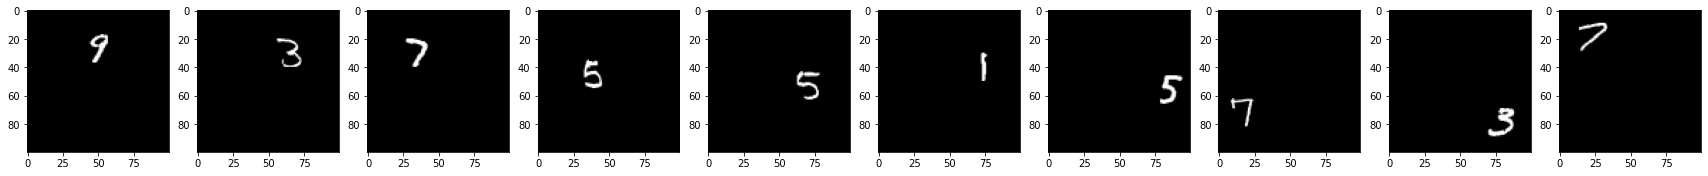

In [22]:
fig = plt.figure(figsize=(30, num_imgs))

for i, img in enumerate(imgs):
    fig.add_subplot(1, num_imgs, i+1)
    plt.imshow(img)

plt.show()

Obtenemos las clases y los boxes a las imagenes

In [23]:
bboxes = [normalize_bbox(s['bbox'].squeeze()) for s in samples]
classes = [s['class_id'] for s in samples]

Agregamos los boxes y las clases a las imagenes

In [24]:
imgs = draw_predictions(imgs, classes, bboxes, [(0, 150, 0)], (90, 95))

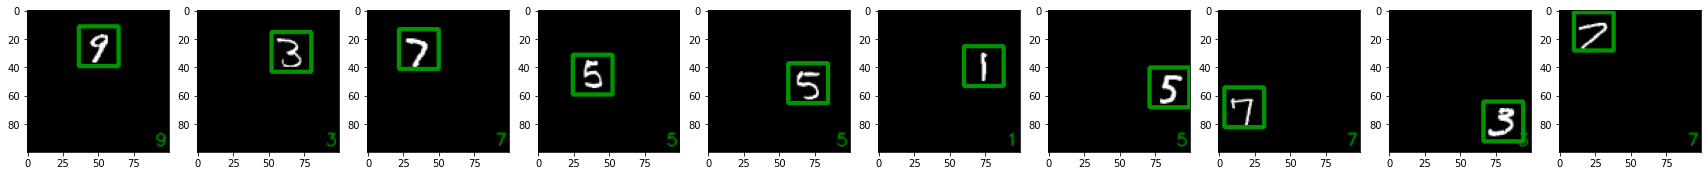

In [25]:
fig = plt.figure(figsize=(30, num_imgs))

for i, img in enumerate(imgs):
    fig.add_subplot(1, num_imgs, i+1)
    plt.imshow(img)

plt.show()

### Image Normalization

Sacamos la media y la desviación de las imagenes que nos ayudará a normalizar las imagenes antes de pasarlas al modelo.

In [26]:
means = None
stds = None

if means is None and stds is None:
    means, stds = [], []
    pixel_values = [
        [], # R, size = H * W * num_images 
        [], # G size = H * W * num_images
        [], # B size = H * W * num_images
    ]

    for x in train_ds:
        img = x['image']

        for channel in range(3):
            channel_pixel_values = list(img[..., channel].flatten())
            pixel_values[channel].extend(channel_pixel_values)

    for channel in range(3):
        means.append(np.mean(pixel_values[channel]))
        stds.append(np.std(pixel_values[channel]))
    
    del pixel_values

In [27]:
print(means)
print(stds)

[2.619323970588235, 2.619323970588235, 2.619323970588235]
[23.784977604424643, 23.784977604424643, 23.784977604424643]


Definimos nuestro normalizador, que luego usaremos en las imagenes antes de pasarlas por los modelos.

In [28]:
class Normalizer(object):
    
    def __init__(self, stds, means):
        """
        Arguments:
        
            stds: array of length 3 containing the standard deviation of each channel in RGB order.
            means: array of length 3 containing the meeans of each channel in RGB order.
        """
        self.stds = stds
        self.means = means
    
    def __call__(self, sample):
        """
        Sample: a dicitonary containing:
            image: sample image in format (C, H, W)
        Returns:
            the image in (C, H, W) format with the channels normalized.
        """
        image = sample['image']
        
        for channel in range(config_dict['num_channels']):
            image[channel] = (image[channel] - means[channel]) / stds[channel]

        sample['image'] = image
        
        return sample

### Image To Tensor

Definimos un transformador que se encarga de convertir las imagenes en tensores. Este transformador reordena los canales de entrada y hace un resize de las imagenes, con este transformador las imagenes ya podrán pasar por nuestro modelo.

In [29]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    
    def __init__(self, img_size, gray: False):
        self.img_size = img_size
        self.gray = gray

    def __call__(self, sample):
        image = sample['image']
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        if(self.gray):
            image = np.expand_dims(image, axis=2)
            
        image = image.transpose((2, 0, 1))
        image = torch.from_numpy(image).float()
        image = resize(image, (self.img_size, self.img_size))
        sample.update({'image': image})
        return sample


Definimos el conjunto de datos que usaremos para un primer entrenamiento del modelo, el cual recibirá las imagenes originales (redimensionadas) y transfer learning.

Para las siguientes etapas agregaremos transfer learning y haremos un proceso de data augmentation para comparar los resultados.

In [30]:
train_ds = MNISTDataset(train_df,gray=config_dict['gray_scale'], root_dir=config_dict['train_images_dir'], transform=ToTensor(img_size=config_dict['img_size'], gray=config_dict['gray_scale']))
train_data = torch.utils.data.DataLoader(train_ds, batch_size=config_dict['batch_size'])
for x in train_data:
    print(x['image'].size())
    break

torch.Size([32, 1, 28, 28])


## Feature Extractor Model (Backbone)

Para construir la arquitectura nos basaremos en la información encontrada en las siguiente fuente:
- [25 Million Images! [0.99757] MNIST](https://www.kaggle.com/code/cdeotte/25-million-images-0-99757-mnist/notebook)
En este articulo se mencionan varias arquitecturas que estaremos probando, en cada una de ellas dejaremos los créditos correspondientes. Revisamos los articulos de las arquitecturas que se mencionan, con el proposito de compreender como y porqué fueron construidas de esa forma.
Algo importante de este articulo es que mencionan como aumentan un dataset de 42000 imagenes a 25 millones rotandolas, escalandolas y haciendo otro tipo de transformaciones.
- [How to choose CNN Architecture MNIST](https://www.kaggle.com/code/cdeotte/how-to-choose-cnn-architecture-mnist/notebook) acá se realizan varios experimentos de arquitectura y se menciona 
- [MNIST Handwritten Digits Classification using a Convolutional Neural Network (CNN)](https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9)

In [31]:
feature_extractor_model = FeatureExtractor(channels=config_dict['num_channels']).to(device)

In [32]:
summary(feature_extractor_model, input_size=(config_dict['num_channels'], config_dict['img_size'], config_dict['img_size']), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
            Conv2d-4           [-1, 32, 24, 24]           9,248
              ReLU-5           [-1, 32, 24, 24]               0
       BatchNorm2d-6           [-1, 32, 24, 24]              64
            Conv2d-7           [-1, 32, 12, 12]          25,632
              ReLU-8           [-1, 32, 12, 12]               0
       BatchNorm2d-9           [-1, 32, 12, 12]              64
          Dropout-10           [-1, 32, 12, 12]               0
           Conv2d-11           [-1, 64, 10, 10]          18,496
             ReLU-12           [-1, 64, 10, 10]               0
      BatchNorm2d-13           [-1, 64, 10, 10]             128
           Conv2d-14             [-1, 6

In [33]:
feature_extractor_output_shape = 1024

## Object classification Model

Definimos la cabeza de clasificación que tomará las salidas de nuestro feature extractor y clasificará las imagen según la probabilidad de que pertenezcan a una clase dada.

In [34]:
classifier = ClassificationHead(input_size=feature_extractor_output_shape, n_classes=config_dict['num_classes']).to(device)

In [35]:
summary(classifier, input_size=(feature_extractor_output_shape,), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         131,200
              ReLU-2                  [-1, 128]               0
       BatchNorm1d-3                  [-1, 128]             256
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
Total params: 132,746
Trainable params: 132,746
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.51
Estimated Total Size (MB): 0.51
----------------------------------------------------------------


## Bounding box prediction Model

Ahora definimos nuestra cabeza de regresión, que también tomara las salidas del feature extractor y calculará las coordenadas de los puntos para encerrar los digitos en un recuadro.

In [36]:
regressor = RegressionHead(input_size=feature_extractor_output_shape).to(device)

In [37]:
summary(regressor, input_size=(feature_extractor_output_shape,), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 768]         787,200
              ReLU-2                  [-1, 768]               0
            Linear-3                  [-1, 256]         196,864
              ReLU-4                  [-1, 256]               0
            Linear-5                    [-1, 4]           1,028
Total params: 985,092
Trainable params: 985,092
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.76
Estimated Total Size (MB): 3.78
----------------------------------------------------------------


## Model for classification and objects location

Ahora definimos el modelo que se encargará de clasificar y localizar las imagenes apoyandose del feature extractor, la cabeza de regresión y la cabeza de clasificación.

In [38]:
class Model(nn.Module):
    def __init__(self, backbone: FeatureExtractor, classifier: ClassificationHead, regressor: RegressionHead):
        super().__init__()
        self.backbone = backbone
        self.cls_head = classifier
        self.reg_head = regressor
        
    def forward(self, x):
        features = self.backbone(x)
        cls_logits = self.cls_head(features)
        pred_bbox = self.reg_head(features)
        predictions = {'bbox': pred_bbox, 'class_id': cls_logits}
        return predictions

In [39]:
model = Model(feature_extractor_model, classifier, regressor).to(device)

In [40]:
summary(model, input_size=(config_dict['num_channels'], config_dict['img_size'], config_dict['img_size']), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
            Conv2d-4           [-1, 32, 24, 24]           9,248
              ReLU-5           [-1, 32, 24, 24]               0
       BatchNorm2d-6           [-1, 32, 24, 24]              64
            Conv2d-7           [-1, 32, 12, 12]          25,632
              ReLU-8           [-1, 32, 12, 12]               0
       BatchNorm2d-9           [-1, 32, 12, 12]              64
          Dropout-10           [-1, 32, 12, 12]               0
           Conv2d-11           [-1, 64, 10, 10]          18,496
             ReLU-12           [-1, 64, 10, 10]               0
      BatchNorm2d-13           [-1, 64, 10, 10]             128
           Conv2d-14             [-1, 6

## Methods for training the model

### Loss Function

La función de perdida es muy importante puesto que el modelo debe tanto clasificar como localizar los números. Para esto usamos dos funciones de perdidas una para la clasificación y otra para la regresión, luego de calculadas ambas funciones de perdida se ponderan para obtener una función de perdida que calcula el total, con esto podemos optimizar ambas tareas al mismo tiempo.

In [41]:
def loss_fn(
    y_true, 
    y_preds, 
    cls_loss_fn: CrossEntropyLoss, 
    bbox_loss_fn: ty.Callable[[ty.Dict[str, torch.Tensor]], torch.Tensor],  
    alpha: float = 0.5
):
    cls_y_true, cls_y_pred = y_true['class_id'].long(), y_preds['class_id'].float().unsqueeze(-1)
    reg_y_true, reg_y_pred = y_true['bbox'].float().squeeze(), y_preds['bbox'].float().squeeze()
    
    cls_loss = cls_loss_fn(cls_y_pred, cls_y_true)
    # Play!!!
    reg_loss = bbox_loss_fn(reg_y_pred, reg_y_true)
    # Adds weights to both tasks
    total_loss = (1 - alpha) * cls_loss + alpha * reg_loss
    return dict(loss=total_loss, reg_loss=reg_loss,cls_loss=cls_loss)

### Metrics

Definimos dos funciones para calcular las metricas de nuestros modelos que para el caso de la clasificación la metrica que se usa es el accuracy y para el caso de la regresión es el Intersection over Union.

#### Accurancy Metrics 

In [42]:
def accuracy(y_true: Tensor, y_pred: Tensor):
    pred = torch.argmax(y_pred, axis=-1)
    y_true = y_true.squeeze()
    correct = torch.eq(pred, y_true).float()
    total = torch.ones_like(correct)
    result = torch.divide(torch.sum(correct), torch.sum(total))
    return result

#### Intersection over Union (IoU) Metric

In [43]:
def iou(y_true: Tensor, y_pred: Tensor):
    pairwise_iou = torchvision.ops.box_iou(y_true.squeeze(), y_pred.squeeze())
    result = torch.trace(pairwise_iou) / pairwise_iou.size()[0]
    return result

### Callbacks

In [44]:
def printer(logs: ty.Dict[str, ty.Any]):
    # print every 5 steps
    if logs['iters'] % 5 != 0:
        return
    print('Iteration #: ',logs['iters'])
    for name, value in logs.items():
        if name == 'iters':
            continue
        
        if type(value) in [float, int]:
            value = round(value, 4)
        elif type(value) is torch.Tensor:
            value = value.detach().cpu().numpy()
            value = np.round(value, 4)
            value = torch.from_numpy(np.asarray(value))
            value.to(device)
            
#             value = torch.round(value, decimals=4)
        
        print(f'\t{name} = {value}')
    print()

### Optimizer

In [45]:
optimizer = torch.optim.Adam(lr=config_dict['learning_rate'], params=model.parameters(), weight_decay=config_dict['weight_decay'])

## Base Model

Corremos nuestro primer modelo que no tiene data augmentation y tampoco Transfer learning. También creamos un arreglo donde iremos guardando nuestros modelos.

Cargamos los datos para el entrenamiento

In [46]:
base_transform = torchvision.transforms.Compose(
    [ToTensor(img_size=config_dict['img_size'], gray=config_dict['gray_scale'])]
)

train_ds = MNISTDataset(train_df, gray=config_dict['gray_scale'], root_dir=config_dict['train_images_dir'], transform=base_transform)
test_ds = MNISTDataset(test_df, gray=config_dict['gray_scale'], root_dir=config_dict['train_images_dir'], transform=base_transform)

train_data = DataLoader(train_ds, batch_size=config_dict['batch_size'], shuffle=True, num_workers=cpu_count())
test_data = DataLoader(test_ds, batch_size=config_dict['batch_size'], num_workers=cpu_count())

/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
train_result = train(
    model,
    optimizer,
    train_data,
    eval_datasets=[('val', test_data)],
    loss_fn=loss_fn,
    metrics={
        'bbox': [('iou', iou)],
        'class_id': [('accuracy', accuracy)]
    },
    callbacks=[printer],
    device=device,
    train_steps=config_dict['num_epochs'],
    eval_steps=5,
)

model = train_result['model']

## Predictions Visualization

In [48]:
num_imgs = 20
ncols = 10
nrows = math.ceil(num_imgs / ncols)

start_idx = 0

inference_ds = MNISTDataset(test_df.iloc[start_idx:start_idx+num_imgs], gray=config_dict['gray_scale'], root_dir='datasets/images/train/')
inference_data = DataLoader(inference_ds, batch_size=num_imgs, num_workers=1, shuffle=False)
inference_batch = next(iter(inference_data))
inference_imgs = np.empty((num_imgs, 1, 28, 28))

transform = base_transform

for i, img in enumerate(inference_batch['image']):
    inference_imgs[i] = transform(dict(image=img.numpy()))['image'].numpy()

preds = model(torch.tensor(inference_imgs).float().to(device))

samples = [inference_ds[i] for i in range(start_idx, num_imgs)]

imgs = [s['image'] for s in samples]
bboxes = [normalize_bbox(s['bbox'].squeeze()) for s in samples]
classes = [s['class_id'] for s in samples]

pred_bboxes = preds['bbox'].detach().cpu().numpy()
pred_bboxes = [normalize_bbox(bbox) for bbox in pred_bboxes]
pred_classes = preds['class_id'].argmax(-1).detach().cpu().numpy()

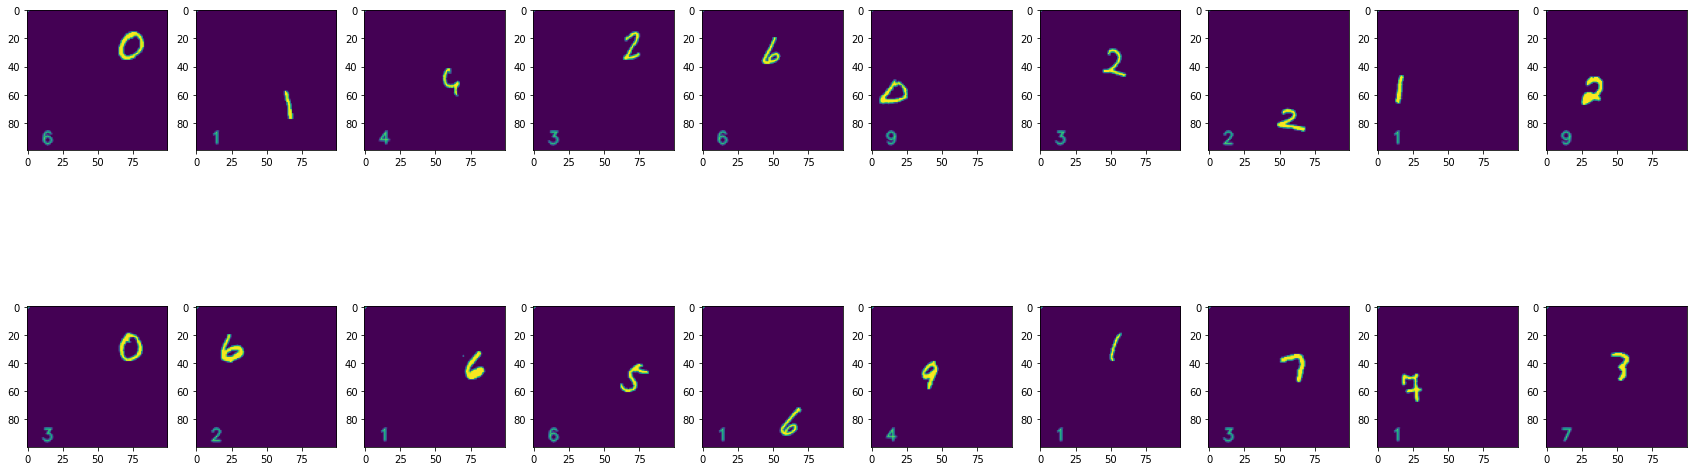

In [49]:
imgs = draw_predictions(imgs, classes, bboxes, [(0, 150, 0)], (90, 95))
# Red: predicted
imgs = draw_predictions(imgs, pred_classes, pred_bboxes, [(200, 0, 0)], (10, 95))

fig = plt.figure(figsize=(30*nrows, num_imgs))
k, j = 1, 1

for img in imgs:
    if j > ncols and k < nrows:
        k += 1
        j = 1
    fig.add_subplot(k, num_imgs, j)
    plt.imshow(img)
    j += 1

plt.show()

## Transfer Learning

Usaremos modelos preentrenados como backbone para realizar la clasificación y regresión. Usaremos el modelo de RestNet y AlexNet para compararlo. 

Los modelos deben recibir imagenes de entrada normalizadas con RGB de 3 canales de la forma  (3 x H x W) donde H y W deben ser de por lo menos 224. Las imagenes deben estar en un rango de [0,1] y normalizarse usando y.

### Image normalization transforms

Definimos un transformador para normalizar y tener las imagenes en el tamaño que se necesitan para el modelo.

In [67]:
config_dict['img_size'] = 224

In [49]:
common_transforms = [
    Normalizer(means=means, stds=stds) ,
    ToTensor(img_size=config_dict['img_size'], gray=False),
]

train_transforms = torchvision.transforms.Compose(
        common_transforms
)

eval_transforms = torchvision.transforms.Compose(common_transforms)

### ResNet152

In [51]:
resnet_pretrained = resnet152(pretrained=True, progress=True).to(device)

In [52]:
summary(resnet_pretrained, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

### Model for classification and regression using transfer learning

In [51]:
class TransferLearningBackbone(nn.Module):
    def __init__(self, pretrained_model):
        super(TransferLearningBackbone, self).__init__()
        self.features = list(pretrained_model.children())[:-1]
        self.features = nn.Sequential(*self.features)
        self.pooling = pretrained_model.avgpool
        self.flatten = nn.Flatten()

    def forward(self, x):
        out = self.features(x)
        out = self.pooling(out)
        out = self.flatten(out)
        return out 

In [54]:
resnet_backbone = TransferLearningBackbone(resnet_pretrained).to(device)
summary(resnet_backbone, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

     BatchNorm2d-372          [-1, 256, 14, 14]             512
            ReLU-373          [-1, 256, 14, 14]               0
          Conv2d-374          [-1, 256, 14, 14]         589,824
     BatchNorm2d-375          [-1, 256, 14, 14]             512
            ReLU-376          [-1, 256, 14, 14]               0
          Conv2d-377         [-1, 1024, 14, 14]         262,144
     BatchNorm2d-378         [-1, 1024, 14, 14]           2,048
            ReLU-379         [-1, 1024, 14, 14]               0
      Bottleneck-380         [-1, 1024, 14, 14]               0
          Conv2d-381          [-1, 256, 14, 14]         262,144
     BatchNorm2d-382          [-1, 256, 14, 14]             512
            ReLU-383          [-1, 256, 14, 14]               0
          Conv2d-384          [-1, 256, 14, 14]         589,824
     BatchNorm2d-385          [-1, 256, 14, 14]             512
            ReLU-386          [-1, 256, 14, 14]               0
          Conv2d-387         [-1, 1024, 

In [55]:
resnet_backbone_output_shape = 2048

In [56]:
class ResNetClassifier(nn.Module):
    def __init__(self, input_size: int, n_classes: int):
        super().__init__()
        self.input_size = input_size
        self.n_classes = n_classes
        
        self.model = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(in_features = self.input_size, out_features=1024), # Shape transformation: (2.048) -> (1.024)
            nn.BatchNorm1d(1024),
            nn.Dropout(0.4),
            nn.Linear(in_features = 1024, out_features=128), # Shape transformation: (1.024) -> (128)
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),
            nn.Linear(in_features = 128, out_features = self.n_classes), # Shape transformation: (128) -> (10)
        )
    
    def forward(self, x):
        return self.model(x)

In [57]:
resnet_classifier = ResNetClassifier(input_size=resnet_backbone_output_shape, n_classes=config_dict['num_classes']).to(device)
summary(resnet_classifier, input_size=(resnet_backbone_output_shape,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Dropout-1                 [-1, 2048]               0
            Linear-2                 [-1, 1024]       2,098,176
       BatchNorm1d-3                 [-1, 1024]           2,048
           Dropout-4                 [-1, 1024]               0
            Linear-5                  [-1, 128]         131,200
       BatchNorm1d-6                  [-1, 128]             256
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
Total params: 2,232,970
Trainable params: 2,232,970
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 8.52
Estimated Total Size (MB): 8.57
----------------------------------------------------------------


In [58]:
class ResNetRegressor(nn.Module):
    def __init__(self, input_size: int):
        super().__init__()
        self.input_size = input_size
        self.model = nn.Sequential(
            nn.Linear(in_features = self.input_size, out_features=1024), # Shape transformation: (2048) -> (1024)
            nn.BatchNorm1d(1024),
            # nn.Dropout(0.4),
            nn.Linear(in_features = 1024, out_features=512), # Shape transformation: (1024) -> (512)
            nn.BatchNorm1d(512),
            # nn.Dropout(0.4),
            nn.Linear(in_features = 512, out_features=256), # Shape transformation: (512) -> (256)
            nn.BatchNorm1d(256),
            # nn.Dropout(0.4),
            nn.Linear(in_features = 256, out_features=128), # Shape transformation: (256) -> (128)
            nn.BatchNorm1d(128),
            # nn.Dropout(0.4),
            nn.Linear(in_features = 128, out_features = 4), # Shape transformation: (128) -> (4)
        )
    
    def forward(self, x):
        return self.model(x)

In [59]:
resnet_regressor = ResNetRegressor(input_size=resnet_backbone_output_shape).to(device)
summary(resnet_classifier, input_size=(resnet_backbone_output_shape,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Dropout-1                 [-1, 2048]               0
            Linear-2                 [-1, 1024]       2,098,176
       BatchNorm1d-3                 [-1, 1024]           2,048
           Dropout-4                 [-1, 1024]               0
            Linear-5                  [-1, 128]         131,200
       BatchNorm1d-6                  [-1, 128]             256
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
Total params: 2,232,970
Trainable params: 2,232,970
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 8.52
Estimated Total Size (MB): 8.57
----------------------------------------------------------------


Definimos nuestro modelo para la clasificación y la regresion

In [60]:
restnet_model = Model(backbone=resnet_backbone, classifier=resnet_classifier, regressor=resnet_regressor).to(device)
summary(restnet_model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

     BatchNorm2d-158         [-1, 1024, 14, 14]           2,048
            ReLU-159         [-1, 1024, 14, 14]               0
      Bottleneck-160         [-1, 1024, 14, 14]               0
          Conv2d-161          [-1, 256, 14, 14]         262,144
     BatchNorm2d-162          [-1, 256, 14, 14]             512
            ReLU-163          [-1, 256, 14, 14]               0
          Conv2d-164          [-1, 256, 14, 14]         589,824
     BatchNorm2d-165          [-1, 256, 14, 14]             512
            ReLU-166          [-1, 256, 14, 14]               0
          Conv2d-167         [-1, 1024, 14, 14]         262,144
     BatchNorm2d-168         [-1, 1024, 14, 14]           2,048
            ReLU-169         [-1, 1024, 14, 14]               0
      Bottleneck-170         [-1, 1024, 14, 14]               0
          Conv2d-171          [-1, 256, 14, 14]         262,144
     BatchNorm2d-172          [-1, 256, 14, 14]             512
            ReLU-173          [-1, 256, 

     BatchNorm1d-529                 [-1, 1024]           2,048
          Linear-530                  [-1, 512]         524,800
     BatchNorm1d-531                  [-1, 512]           1,024
          Linear-532                  [-1, 256]         131,328
     BatchNorm1d-533                  [-1, 256]             512
          Linear-534                  [-1, 128]          32,896
     BatchNorm1d-535                  [-1, 128]             256
          Linear-536                    [-1, 4]             516
 ResNetRegressor-537                    [-1, 4]               0
Total params: 63,168,334
Trainable params: 63,168,334
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 606.73
Params size (MB): 240.97
Estimated Total Size (MB): 848.27
----------------------------------------------------------------


### Train Model

In [ ]:
train_ds = MNISTDataset(train_df, gray=False, root_dir=config_dict['train_images_dir'], transform=train_transforms)
test_ds = MNISTDataset(test_df, gray=False, root_dir=config_dict['train_images_dir'], transform=eval_transforms)

train_data = DataLoader(train_ds, batch_size=config_dict['batch_size'], shuffle=True, num_workers=cpu_count())
test_data = DataLoader(test_ds, batch_size=config_dict['batch_size'], num_workers=cpu_count())

In [ ]:
train_result = train(
    restnet_model,
    optimizer,
    train_data,
    eval_datasets=[('val', test_data)],
    loss_fn=loss_fn,
    metrics={
        'bbox': [('iou', iou)],
        'class_id': [('accuracy', accuracy)]
    },
    callbacks=[printer],
    device=device,
    train_steps=config_dict['num_epochs'],
    eval_steps=5,
)

model = train_result['model']

### AlexNet

In [47]:
alexnet_pretrained = alexnet(pretrained=True, progress=True).to(device)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [48]:
summary(alexnet_pretrained, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

### Model for classification and regression using transfer learning

In [53]:
alexnet_backbone = TransferLearningBackbone(alexnet_pretrained).to(device)
summary(alexnet_backbone, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [56]:
alexnet_backbone_output_shape = 9216

In [58]:
class AlexNetClassifier(nn.Module):
    def __init__(self, input_size: int, n_classes: int):
        super().__init__()
        self.input_size = input_size
        self.n_classes = n_classes
        
        self.model = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(in_features = self.input_size, out_features=4096), # Shape transformation: (9216) -> (4096)
            nn.BatchNorm1d(4096),
            nn.Dropout(0.4),
            nn.Linear(in_features = 4096, out_features=2048), # Shape transformation: (4096) -> (2048)
            nn.BatchNorm1d(2048),
            nn.Dropout(0.4),
            nn.Linear(in_features = 2048, out_features=1024), # Shape transformation: (2048) -> (1024)
            nn.BatchNorm1d(1024),
            nn.Dropout(0.4),
            nn.Linear(in_features = 1024, out_features=512), # Shape transformation: (1024) -> (512)
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(in_features = 512, out_features=256), # Shape transformation: (512) -> (256)
            nn.BatchNorm1d(256),
            nn.Dropout(0.4),
            nn.Linear(in_features = 256, out_features=128), # Shape transformation: (256) -> (128)
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),
            nn.Linear(in_features = 128, out_features = self.n_classes), # Shape transformation: (128) -> (10)
        )
    
    def forward(self, x):
        return self.model(x)

In [59]:
alexnet_classifier = AlexNetClassifier(input_size=alexnet_backbone_output_shape, n_classes=config_dict['num_classes']).to(device)
summary(alexnet_classifier, input_size=(alexnet_backbone_output_shape,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Dropout-1                 [-1, 9216]               0
            Linear-2                 [-1, 4096]      37,752,832
       BatchNorm1d-3                 [-1, 4096]           8,192
           Dropout-4                 [-1, 4096]               0
            Linear-5                 [-1, 2048]       8,390,656
       BatchNorm1d-6                 [-1, 2048]           4,096
           Dropout-7                 [-1, 2048]               0
            Linear-8                 [-1, 1024]       2,098,176
       BatchNorm1d-9                 [-1, 1024]           2,048
          Dropout-10                 [-1, 1024]               0
           Linear-11                  [-1, 512]         524,800
      BatchNorm1d-12                  [-1, 512]           1,024
          Dropout-13                  [-1, 512]               0
           Linear-14                  [

In [60]:
class AlexNetRegressor(nn.Module):
    def __init__(self, input_size: int):
        super().__init__()
        self.input_size = input_size
        self.model = nn.Sequential(
            nn.Linear(in_features = self.input_size, out_features=2048), # Shape transformation: (9.216) -> (4.096)
            nn.BatchNorm1d(2048),
            nn.Linear(in_features = 2048, out_features=1024), # Shape transformation: (9.216) -> (4.096)
            nn.BatchNorm1d(1024),
            # nn.Dropout(0.4),
            nn.Linear(in_features = 1024, out_features=512), # Shape transformation: (4.096) -> (2.048)
            nn.BatchNorm1d(512),
            # nn.Dropout(0.4),
            nn.Linear(in_features = 512, out_features=256), # Shape transformation: (2.048) -> (1.024)
            nn.BatchNorm1d(256),
            # nn.Dropout(0.4),
            nn.Linear(in_features = 256, out_features=128), # Shape transformation: (1.024) -> (128)
            nn.BatchNorm1d(128),
            # nn.Dropout(0.4),
            nn.Linear(in_features = 128, out_features = 4), # Shape transformation: (128) -> (4)
        )
    
    def forward(self, x):
        return self.model(x)

In [62]:
alexnet_regressor = AlexNetRegressor(input_size=alexnet_backbone_output_shape).to(device)
summary(alexnet_regressor, input_size=(alexnet_backbone_output_shape,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2048]      18,876,416
       BatchNorm1d-2                 [-1, 2048]           4,096
            Linear-3                 [-1, 1024]       2,098,176
       BatchNorm1d-4                 [-1, 1024]           2,048
            Linear-5                  [-1, 512]         524,800
       BatchNorm1d-6                  [-1, 512]           1,024
            Linear-7                  [-1, 256]         131,328
       BatchNorm1d-8                  [-1, 256]             512
            Linear-9                  [-1, 128]          32,896
      BatchNorm1d-10                  [-1, 128]             256
           Linear-11                    [-1, 4]             516
Total params: 21,672,068
Trainable params: 21,672,068
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Fo

Definimos nuestro modelo para la clasificación y la regresion

In [63]:
alexnet_model = Model(backbone=alexnet_backbone, classifier=alexnet_classifier, regressor=alexnet_regressor).to(device)
summary(alexnet_model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

### Train Model

In [64]:
train_ds = MNISTDataset(train_df, gray=False, root_dir=config_dict['train_images_dir'], transform=train_transforms)
test_ds = MNISTDataset(test_df, gray=False, root_dir=config_dict['train_images_dir'], transform=eval_transforms)

train_data = DataLoader(train_ds, batch_size=config_dict['batch_size'], shuffle=True, num_workers=cpu_count())
test_data = DataLoader(test_ds, batch_size=config_dict['batch_size'], num_workers=cpu_count())

/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [65]:
torch.cuda.empty_cache()

In [66]:
train_result = train(
    alexnet_model,
    optimizer,
    train_data,
    eval_datasets=[('val', test_data)],
    loss_fn=loss_fn,
    metrics={
        'bbox': [('iou', iou)],
        'class_id': [('accuracy', accuracy)]
    },
    callbacks=[printer],
    device=device,
    train_steps=config_dict['num_epochs'],
    eval_steps=5,
)

model = train_result['model']

/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Iteration #:  0
	alpha = 0.5
	train_loss = 17.216299057006836
	train_reg_loss = 32.0
	train_cls_loss = 2.4326999187469482
	train_iou = 0.0
	train_accuracy = 0.125
	val_loss = 9.079400062561035
	val_reg_loss = 15.864800453186035
	val_cls_loss = 2.2939999103546143
	val_iou = 0.0085
	val_accuracy = 0.125

Iteration #:  5
	alpha = 0.519
	train_loss = 17.72879981994629
	train_reg_loss = 31.768299102783203
	train_cls_loss = 2.5773000717163086
	train_iou = 0.0072
	train_accuracy = 0.0625
	val_loss = 9.37559986114502
	val_reg_loss = 15.934000015258789
	val_cls_loss = 2.2976999282836914
	val_iou = 0.0041
	val_accuracy = 0.125

Iteration #:  10
	alpha = 0.5364
	train_loss = 18.29680061340332
	train_reg_loss = 31.99650001525879
	train_cls_loss = 2.4481000900268555
	train_iou = 0.0001
	train_accuracy = 0.0625
	val_loss = 9.553600311279297
	val_reg_loss = 15.834500312805176
	val_cls_loss = 2.287400007247925
	val_iou = 0.0103
	val_accuracy = 0.125

Iteration #:  15
	alpha = 0.5522
	train_loss = 18.6

Iteration #:  130
	alpha = 0.7261
	train_loss = 23.673999786376953
	train_reg_loss = 31.628799438476562
	train_cls_loss = 2.5876998901367188
	train_iou = 0.0116
	train_accuracy = 0.09380000084638596
	val_loss = 12.199299812316895
	val_reg_loss = 15.933699607849121
	val_cls_loss = 2.2999000549316406
	val_iou = 0.0041
	val_accuracy = 0.1875

Iteration #:  135
	alpha = 0.7298
	train_loss = 23.944700241088867
	train_reg_loss = 31.854400634765625
	train_cls_loss = 2.5820000171661377
	train_iou = 0.0045
	train_accuracy = 0.15620000660419464
	val_loss = 12.2923002243042
	val_reg_loss = 15.992500305175781
	val_cls_loss = 2.2988998889923096
	val_iou = 0.0005
	val_accuracy = 0.1875

Iteration #:  140
	alpha = 0.7333
	train_loss = 24.110599517822266
	train_reg_loss = 31.926799774169922
	train_cls_loss = 2.6161999702453613
	train_iou = 0.0023
	train_accuracy = 0.09380000084638596
	val_loss = 12.309300422668457
	val_reg_loss = 15.949899673461914
	val_cls_loss = 2.2980000972747803
	val_iou = 0.0031


## Data Augmentation

Realizaremos data augmentation con el fin de mejorar los resultados de los modelos, al tener un dataset mucho más grande.

### AlbumentationsWrapper

In [69]:
class AlbumentationsWrapper(object):
    
    def __init__(self, transform):
        self.transform = transform
    
    def __call__(self, sample):
        transformed = self.transform(
            image=sample['image'], 
            bboxes=sample['bbox'],
            category=sample['class_id']
        )
        sample['image'] = transformed['image']
        sample['bbox'] = np.array(transformed['bboxes'])
        return sample

### Train data augmentation

In [72]:
train_data_augmentations = A.Compose([
        A.RandomScale(scale_limit=0.01, p=1),
        A.ImageCompression(p=1),
        A.Superpixels(p=1, n_segments=30, max_size=None),
        A.Rotate(limit=(-20, 20), p=1),
        A.Resize(height=config_dict['img_size'], width=config_dict['img_size'], p=1) # p=1 means always apply
    ],
    bbox_params=A.BboxParams(
        format='albumentations', 
        label_fields=['category'],
    )
)

train_transforms_da = torchvision.transforms.Compose(
    [
        AlbumentationsWrapper(train_data_augmentations),
    ] + common_transforms
)

## Train Models with Data augmentation

In [73]:
train_ds = MNISTDataset(train_df, gray=False, root_dir=config_dict['train_images_dir'], transform=train_transforms_da)
test_ds = MNISTDataset(test_df, gray=False, root_dir=config_dict['train_images_dir'], transform=eval_transforms)

train_data = DataLoader(train_ds, batch_size=config_dict['batch_size'], shuffle=True, num_workers=cpu_count())
test_data = DataLoader(test_ds, batch_size=config_dict['batch_size'], num_workers=cpu_count())

/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [74]:
torch.cuda.empty_cache()

In [75]:
train_result = train(
    alexnet_model,
    optimizer,
    train_data,
    eval_datasets=[('val', test_data)],
    loss_fn=loss_fn,
    metrics={
        'bbox': [('iou', iou)],
        'class_id': [('accuracy', accuracy)]
    },
    callbacks=[printer],
    device=device,
    train_steps=config_dict['num_epochs'],
    eval_steps=5,
)

model = train_result['model']

/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/opt/conda/lib/python3.8/site-packages/albumentations/augmentations/functional.py:1232: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = skimage.segmentation.slic(image, n_segments=n_segments, compactness=10)
/opt/conda/lib/python3.8/site-packages/albumentations/augmentations/functional.py:1232: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it wi

/opt/conda/lib/python3.8/site-packages/albumentations/augmentations/functional.py:1232: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = skimage.segmentation.slic(image, n_segments=n_segments, compactness=10)
/opt/conda/lib/python3.8/site-packages/albumentations/augmentations/functional.py:1232: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = skimage.segmentation.slic(image, n_segments=n_segments, compactness=10)


Iteration #:  0
	alpha = 0.5
	train_loss = 17.10420036315918
	train_reg_loss = 31.66510009765625
	train_cls_loss = 2.5434000492095947
	train_iou = 0.0105
	train_accuracy = 0.125
	val_loss = 9.150899887084961
	val_reg_loss = 16.0
	val_cls_loss = 2.301800012588501
	val_iou = 0.0
	val_accuracy = 0.125

Iteration #:  5
	alpha = 0.519
	train_loss = 17.797000885009766
	train_reg_loss = 31.975400924682617
	train_cls_loss = 2.495500087738037
	train_iou = 0.0008
	train_accuracy = 0.125
	val_loss = 9.413299560546875
	val_reg_loss = 16.0
	val_cls_loss = 2.304800033569336
	val_iou = 0.0
	val_accuracy = 0.125

Iteration #:  10
	alpha = 0.5364
	train_loss = 18.24090003967285
	train_reg_loss = 31.811199188232422
	train_cls_loss = 2.5420000553131104
	train_iou = 0.0059
	train_accuracy = 0.125
	val_loss = 9.635299682617188
	val_reg_loss = 15.978300094604492
	val_cls_loss = 2.297300100326538
	val_iou = 0.0014
	val_accuracy = 0.125

Iteration #:  15
	alpha = 0.5522
	train_loss = 18.81920051574707
	train_

Iteration #:  130
	alpha = 0.7261
	train_loss = 23.54599952697754
	train_reg_loss = 31.466699600219727
	train_cls_loss = 2.550100088119507
	train_iou = 0.0167
	train_accuracy = 0.031199999153614044
	val_loss = 12.250300407409668
	val_reg_loss = 16.0
	val_cls_loss = 2.310699939727783
	val_iou = 0.0
	val_accuracy = 0.125

Iteration #:  135
	alpha = 0.7298
	train_loss = 23.875200271606445
	train_reg_loss = 31.804000854492188
	train_cls_loss = 2.4612998962402344
	train_iou = 0.0061
	train_accuracy = 0.09380000084638596
	val_loss = 12.30049991607666
	val_reg_loss = 16.0
	val_cls_loss = 2.309000015258789
	val_iou = 0.0
	val_accuracy = 0.1875

Iteration #:  140
	alpha = 0.7333
	train_loss = 23.939599990844727
	train_reg_loss = 31.729400634765625
	train_cls_loss = 2.517699956893921
	train_iou = 0.0085
	train_accuracy = 0.1875
	val_loss = 12.349300384521484
	val_reg_loss = 16.0
	val_cls_loss = 2.3099000453948975
	val_iou = 0.0
	val_accuracy = 0.1875

Iteration #:  145
	alpha = 0.7367
	train_los

In [ ]:
# Data
train_ds = MNISTDataset(train_df, root_dir=config_dict['train_images_dir'], transform=train_transforms)
test_ds = MNISTDataset(test_df, root_dir=config_dict['train_images_dir'], transform=eval_transforms)

train_data = DataLoader(train_ds, batch_size=config_dict['batch_size'], shuffle=True, num_workers=cpu_count())
test_data = DataLoader(test_ds, batch_size=config_dict['batch_size'], num_workers=cpu_count())

# # Model
# model = Model(feature_extractor_model, classifier, regressor).to(device)
# summary(model, input_size=(3, config_dict['img_size'], config_dict['img_size']))

## Image To Tensor

### Image normalization

In [ ]:
train_ds = MNISTDataset(train_df, root_dir=config_dict['train_images_dir'])

means = None 
stds = None

if means is None and stds is None:
    means, stds = [], []
    pixel_values = [
        [], # R, size = H * W * num_images 
        [], # G size = H * W * num_images
        [], # B size = H * W * num_images
    ]

    for x in train_ds:
        img = x['image']

        for channel in range(config_dict['num_channels']):
            channel_pixel_values = list(img[..., channel].flatten())
            pixel_values[channel].extend(channel_pixel_values)

    for channel in range(config_dict['num_channels']):
        means.append(np.mean(pixel_values[channel]))
        stds.append(np.std(pixel_values[channel]))
    
    del pixel_values


In [ ]:
example_img = cv2.imread(config_dict['train_images_dir']+train_df.iloc[0].filename)
example_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)

print(example_img.shape)
example_img[..., 0] = 0
example_img[..., 2] = 0

plt.imshow(example_img)

Definimos el transformador que convertirá una imagen en un tensor.

In [ ]:
class TVTransformWrapper(object):
    """Torch Vision Transform Wrapper
    """
    def __init__(self, transform: torch.nn.Module):
        self.transform = transform
        
    def __call__(self, sample):
        sample['image'] = self.transform(sample['image'])
        return sample

In [ ]:
class AlbumentationsWrapper(object):
    
    def __init__(self, transform):
        self.transform = transform
    
    def __call__(self, sample):
        transformed = self.transform(
            image=sample['image'], 
            bboxes=sample['bbox']
        )
        sample['image'] = transformed['image']
        sample['bbox'] = np.array(transformed['bboxes'])
        return sample

In [ ]:
common_transforms = [
    Normalizer(
        means=means,
        stds=stds,
    ),
    ToTensor(img_size=config_dict['img_size']),
]

### Data augmentations 

In [ ]:
train_ds = MNISTDataset(train_df, root_dir=config_dict['train_images_dir'])

x = next(iter(train_ds))
x_transformed = copy.deepcopy(x)
x_transformed = train_transforms(x_transformed)

In [ ]:
# def draw_bbox_transformed(img, bbox, color):
#     """
#     Draw the bounding box on the image.

#     Source: https://www.kaggle.com/code/sebastingarcaacosta/tutoria-1

#     Args:
#         img (list): List of images.
#         bbox (list): List of bouding boxes.
#         color (list): List of colors.

#     Returns:
#         img (list): List of images with the bounding box.
#     """
#     xmin, ymin, xmax, ymax = bbox
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color, 2)
#     return img

In [ ]:
# original_img = x['image']
# transformed_img = x_transformed['image'].numpy().transpose(1, 2, 0)

# original_img = draw_bbox(
#     original_img,
#     normalize_bbox(x['bbox'].squeeze()),
#     (0, 255, 0)
# )

# transformed_img = draw_bbox_transformed(
#     transformed_img,
#     normalize_bbox(x_transformed['bbox'].squeeze()),
#     (0, 255, 0)
# )

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# axes[0].imshow(original_img)
# axes[0].set_title('Original digit')

# axes[1].imshow(transformed_img)
# axes[1].set_title('Transformed digit')

# plt.show()

## Model for classification and objects location

In [ ]:
def get_output_shape(model: nn.Sequential, image_dim: ty.Tuple[int, int, int]):
    return model(torch.rand(*(image_dim)).to(device)).data.shape

In [ ]:
torch.cuda.empty_cache()

In [ ]:
print('image', x['image'].size())

In [ ]:
x['image'] = x['image'].to(device)
preds = model(x['image'])
preds

## Metrics

## Callbacks


## Training loop

In [ ]:
def evaluate(
    logs: ty.Dict[str, ty.Any], 
    labels: ty.Dict[str, Tensor],
    preds: ty.Dict[str, Tensor],
    eval_set: str,
    metrics: ty.Dict[str, ty.Callable[[Tensor, Tensor], Tensor]],
    losses: ty.Optional[ty.Dict[str, Tensor]] = None,
) -> ty.Dict[str, ty.Any]:
    
    if losses is not None:
        for loss_name, loss_value in losses.items():
            logs[f'{eval_set}_{loss_name}'] = loss_value
    
    for task_name, label in labels.items():
        for metric_name, metric in metrics[task_name]:
            value = metric(label, preds[task_name])
            logs[f'{eval_set}_{metric_name}'] = value
            
    return logs

def step(
    model: Model, 
    optimizer: Optimizer, 
    batch: MNISTDataset,
    loss_fn: ty.Callable[[ty.Dict[str, torch.Tensor]], torch.Tensor],
    device: str,
    train: bool = False,
) -> ty.Tuple[ty.Dict[str, Tensor], ty.Dict[str, Tensor]]:
    
    if train:
        optimizer.zero_grad()
    
    img = batch.pop('image').to(device)
    
    for k in list(batch.keys()):
        batch[k] = batch[k].to(device)
    
    preds = model(img.float())
    losses = loss_fn(batch, preds)
    final_loss = losses['loss']
    if train:
        final_loss.backward()
        optimizer.step()
    
    return losses, preds


def train(
    model: Model, 
    optimizer: Optimizer, 
    dataset: DataLoader,
    eval_datasets: ty.List[ty.Tuple[str, DataLoader]],
    loss_fn: ty.Callable[[ty.Dict[str, torch.Tensor]], torch.Tensor],
    metrics: ty.Dict[str, ty.Callable[[Tensor, Tensor], Tensor]],
    callbacks: ty.List[ty.Callable[[ty.Dict[ty.Any, ty.Any]], None]],
    device: str,
    train_steps: 100,
    eval_steps: 10,
) -> Model:
    # Send model to device (GPU or CPU)
    model = model.to(device)
    iters = 0
    iterator = iter(dataset)
    assert train_steps > eval_steps, 'Train steps should be greater than the eval steps'
    
    while iters <= train_steps:
        logs = dict()
        logs['iters'] = iters
        try:
            batch = next(iterator)
        except StopIteration:
            iterator = iter(dataset)
            batch = next(iterator)
        # Send batch to device 
        losses, preds = step(model, optimizer, batch, loss_fn, device, train=True)
        logs = evaluate(logs, batch, preds, 'train', metrics, losses)
        
        # Eval every eval_steps iterations
        if iters % eval_steps == 0:        
            # Evaluate
            # Deactives layers that only needed to train
            # https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615
            model.eval()
            
            # Avoids calculating gradients in evaluation dataset. 
            with torch.no_grad():

                for name, dataset in eval_datasets:
                    for batch in dataset:
                        losses, preds = step(model, optimizer, batch, loss_fn, device, train=False)            
                        logs = evaluate(logs, batch, preds, name, metrics, losses)
        
        for callback in callbacks:
            callback(logs)
        
        iters += 1
    
    return model

## Run

In [ ]:
# Data
train_ds = MNISTDataset(train_df, root_dir=config_dict['train_images_dir'], transform=train_transforms)
test_ds = MNISTDataset(test_df, root_dir=config_dict['train_images_dir'], transform=eval_transforms)

train_data = DataLoader(train_ds, batch_size=config_dict['batch_size'], shuffle=True, num_workers=cpu_count())
test_data = DataLoader(test_ds, batch_size=config_dict['batch_size'], num_workers=cpu_count())

# Model
model = Model(feature_extractor_model, classifier, regressor).to(device)
summary(model, input_size=(config_dict['num_channels'], config_dict['img_size'], config_dict['img_size']))

In [ ]:
# Optimizer



## Predictions visualization

## Save Model

In [ ]:
from datetime import datetime
import time
from time import localtime

In [ ]:
date = datetime.fromtimestamp(time.time(), tz=None)

In [ ]:
date = date.strftime("%Y-%m-%d_%H-%M-%S")

In [ ]:
torch.save(model, f'models/{date}-pretrained_model.pth')

## Submission

In [ ]:
# Perform inference on cpu in order to avoid memory problems 
device = 'cuda'
model = model.to(device)

test_df = pd.read_csv('datasets/test.csv')

test_ds = MNISTDataset(test_df, root_dir='datasets/images/test/', labeled=False, transform=eval_transforms)
test_data = DataLoader(test_ds, batch_size=1, num_workers=cpu_count(), shuffle=False)

class_preds = []
bbox_preds = []

for batch in test_data:
    batch_preds = model(batch['image'].float().to(device))
    
    class_pred = batch_preds['class_id'].argmax(-1).detach().cpu().numpy()
    bbox_pred = batch_preds['bbox'].detach().cpu().numpy()
    
    class_preds.append(class_pred.squeeze())
    bbox_preds.append(bbox_pred.squeeze())

In [ ]:
class_preds = np.array(class_preds)
bbox_preds = np.array(bbox_preds)

In [ ]:
submission = pd.DataFrame(
    index=test_df.filename,
    data={
        'class': class_preds,
        # Descomentar esta línea cuando generen el archivo de submissions final, 
        # para incluir las predicciones de su modelo para regresión  
        #'bbox': bbox_preds
    }
)
submission

In [ ]:
submission.to_csv(f'submissions/{date}_submission.csv')